In [52]:
%run 0.0_Dependance.ipynb

In [53]:
import warnings

# Ignorer les messages d'avertissement (pas spécifiques, tous les avertissements seront ignorés)
warnings.filterwarnings('ignore')


In [54]:
from joblib import load,dump
df_score_random = load("df_score_random.joblib")
df_score_random

,n_estimators,max_depth,learning_rate,gamma,subsample,colsample_bytree,min_child_weight,reg_alpha,reg_lambda,objective,eval_metric,booster,LogLoss_mean,LogLoss_std
0,250,9,0.01,0.1,0.75,1,10,1,1,multi:softprob,mlogloss,gbtree,-0.495877,0.007797
1,100,3,0.2,0.5,1,1,1,0.1,10,multi:softprob,mlogloss,gbtree,-0.448388,0.014140
2,1000,9,0.05,1,0.5,0.5,10,1,10,multi:softprob,mlogloss,gbtree,-0.440227,0.015089
3,500,12,0.2,0,0.75,0.75,5,0,0,multi:softprob,mlogloss,gbtree,-0.619045,0.030493
4,500,9,0.2,1,0.5,1,5,0,10,multi:softprob,mlogloss,gbtree,-0.466344,0.015956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30495,50,6,0.05,0,0.5,0.75,5,1,0,multi:softprob,mlogloss,gbtree,-0.496917,0.006187
30496,1000,3,0.1,1,0.75,1,1,0.1,10,multi:softprob,mlogloss,gbtree,-0.446553,0.013987
30497,500,9,0.1,0,0.5,0.75,10,0,0,multi:softprob,mlogloss,gbtree,-0.506701,0.021323
30498,100,9,0.2,0.1,1,1,5,0.1,1,multi:softprob,mlogloss,gbtree,-0.477485,0.015654


In [62]:
df_score_random = df_score_random.sort_values(by='LogLoss_mean', ascending=False)
df_score_random_top_1000 = df_score_random.iloc[:1000,:]
df_score_random_top_1000

,n_estimators,max_depth,learning_rate,gamma,subsample,colsample_bytree,min_child_weight,reg_alpha,reg_lambda,objective,eval_metric,booster,LogLoss_mean,LogLoss_std
1884,1000,9,0.01,1,0.5,0.5,1,0.1,0,multi:softprob,mlogloss,gbtree,-0.432742,0.014293
6039,1000,6,0.01,1,0.5,0.5,1,0.1,0,multi:softprob,mlogloss,gbtree,-0.432966,0.013874
599,1000,12,0.01,1,0.5,0.5,1,0,0,multi:softprob,mlogloss,gbtree,-0.433129,0.013634
14506,1000,6,0.01,0.5,0.5,0.5,1,0.1,1,multi:softprob,mlogloss,gbtree,-0.433157,0.013708
24506,1000,6,0.01,0.5,0.5,0.5,1,0.1,1,multi:softprob,mlogloss,gbtree,-0.433157,0.013708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2027,1000,9,0.01,0.5,0.5,0.75,1,1,1,multi:softprob,mlogloss,gbtree,-0.439030,0.014576
11816,1000,9,0.05,1,0.5,0.5,1,0.1,0,multi:softprob,mlogloss,gbtree,-0.439035,0.015382
21816,1000,9,0.05,1,0.5,0.5,1,0.1,0,multi:softprob,mlogloss,gbtree,-0.439035,0.015382
1859,100,6,0.1,0,0.75,0.5,5,0.1,0,multi:softprob,mlogloss,gbtree,-0.439036,0.013604


In [64]:

for i in range(1000):
    df = df_score_random_top_1000.iloc[i,:-2]
    dico = df.to_dict()
    model = XGBClassifier(**dico)
    model.fit(X_train, y_train)
    probs = model.predict_proba(X_test)
    logloss = log_loss(y_test, probs)
    break


{'n_estimators': 1000, 'max_depth': 9, 'learning_rate': 0.01, 'gamma': 1, 'subsample': 0.5, 'colsample_bytree': 0.5, 'min_child_weight': 1, 'reg_alpha': 0.1, 'reg_lambda': 0, 'objective': 'multi:softprob', 'eval_metric': 'mlogloss', 'booster': 'gbtree'}


In [60]:
dico

{'n_estimators': {0: 250,
  1: 100,
  2: 1000,
  3: 500,
  4: 500,
  5: 1000,
  6: 100,
  7: 100,
  8: 1000,
  9: 250,
  10: 1000,
  11: 500,
  12: 500,
  13: 100,
  14: 50,
  15: 500,
  16: 50,
  17: 50,
  18: 50,
  19: 1000,
  20: 50,
  21: 500,
  22: 500,
  23: 250,
  24: 250,
  25: 250,
  26: 50,
  27: 100,
  28: 1000,
  29: 250,
  30: 1000,
  31: 250,
  32: 250,
  33: 50,
  34: 100,
  35: 100,
  36: 250,
  37: 50,
  38: 250,
  39: 100,
  40: 500,
  41: 1000,
  42: 50,
  43: 500,
  44: 100,
  45: 500,
  46: 50,
  47: 250,
  48: 50,
  49: 100,
  50: 50,
  51: 50,
  52: 100,
  53: 1000,
  54: 50,
  55: 50,
  56: 250,
  57: 1000,
  58: 250,
  59: 100,
  60: 250,
  61: 1000,
  62: 100,
  63: 500,
  64: 250,
  65: 250,
  66: 250,
  67: 100,
  68: 100,
  69: 500,
  70: 250,
  71: 250,
  72: 500,
  73: 500,
  74: 50,
  75: 100,
  76: 1000,
  77: 50,
  78: 50,
  79: 100,
  80: 500,
  81: 1000,
  82: 1000,
  83: 250,
  84: 1000,
  85: 250,
  86: 100,
  87: 100,
  88: 50,
  89: 250,
  90: 50

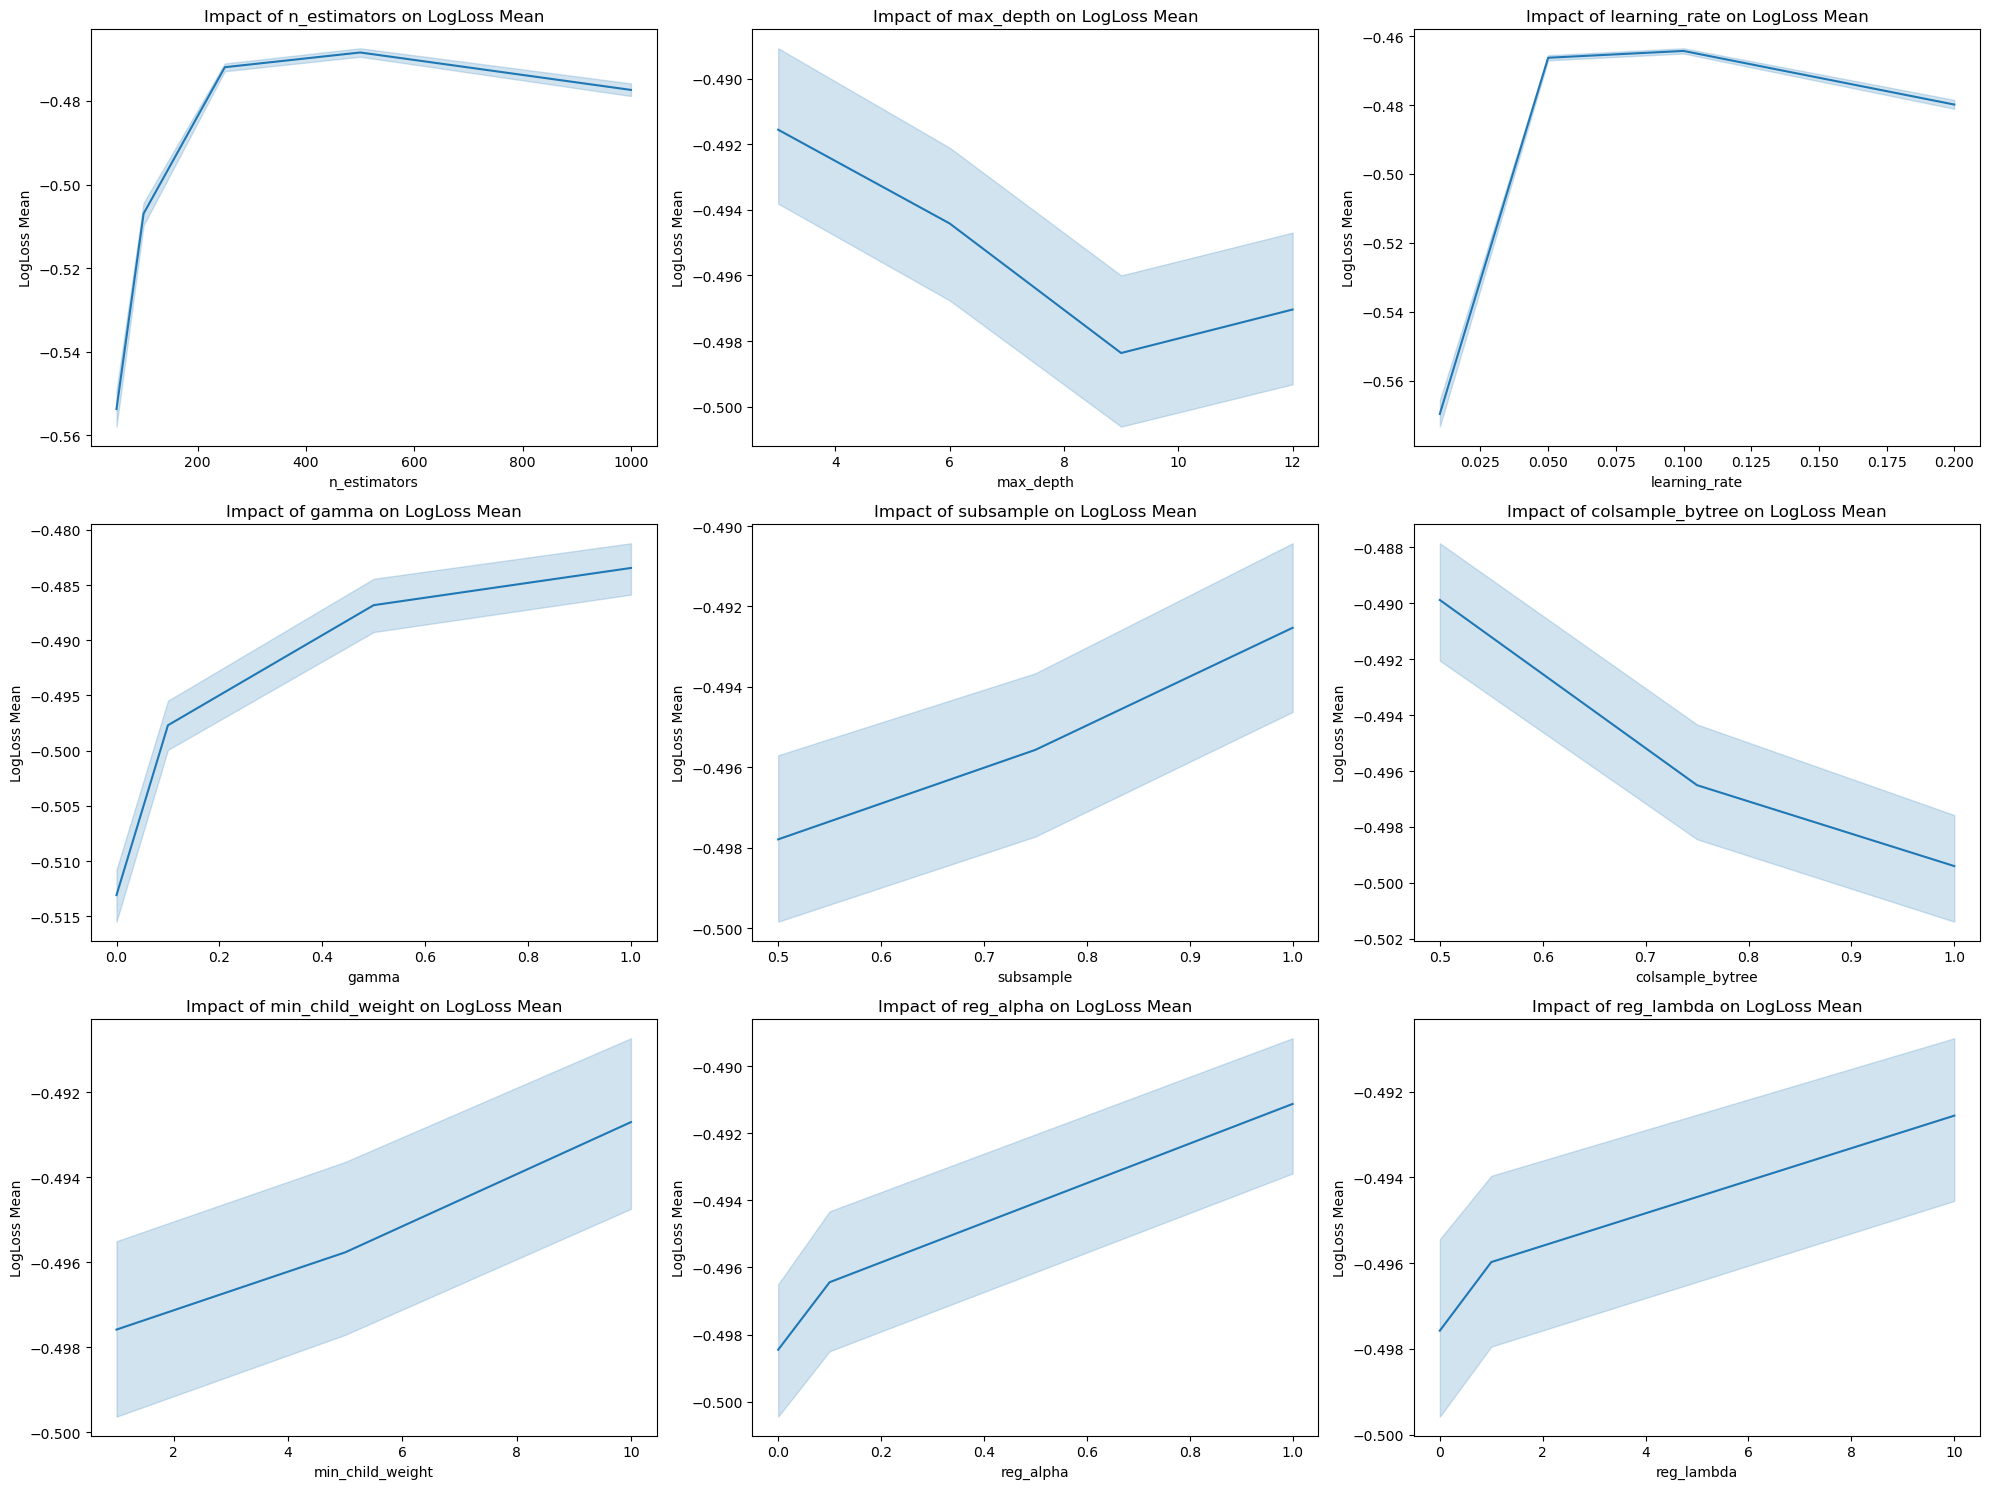

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

hyperparameters = ['n_estimators', 'max_depth', 'learning_rate', 'gamma', 'subsample', 'colsample_bytree', 'min_child_weight', 'reg_alpha', 'reg_lambda']

plt.figure(figsize=(20, 15))
for i, hyperparam in enumerate(hyperparameters, 1):
    plt.subplot(3, 3, i)
    sns.lineplot(data=df_score_random_v1, x=hyperparam, y='LogLoss_mean')
    plt.title(f'Impact of {hyperparam} on LogLoss Mean')
    plt.xlabel(hyperparam)
    plt.ylabel('LogLoss Mean')
plt.tight_layout()
plt.show()


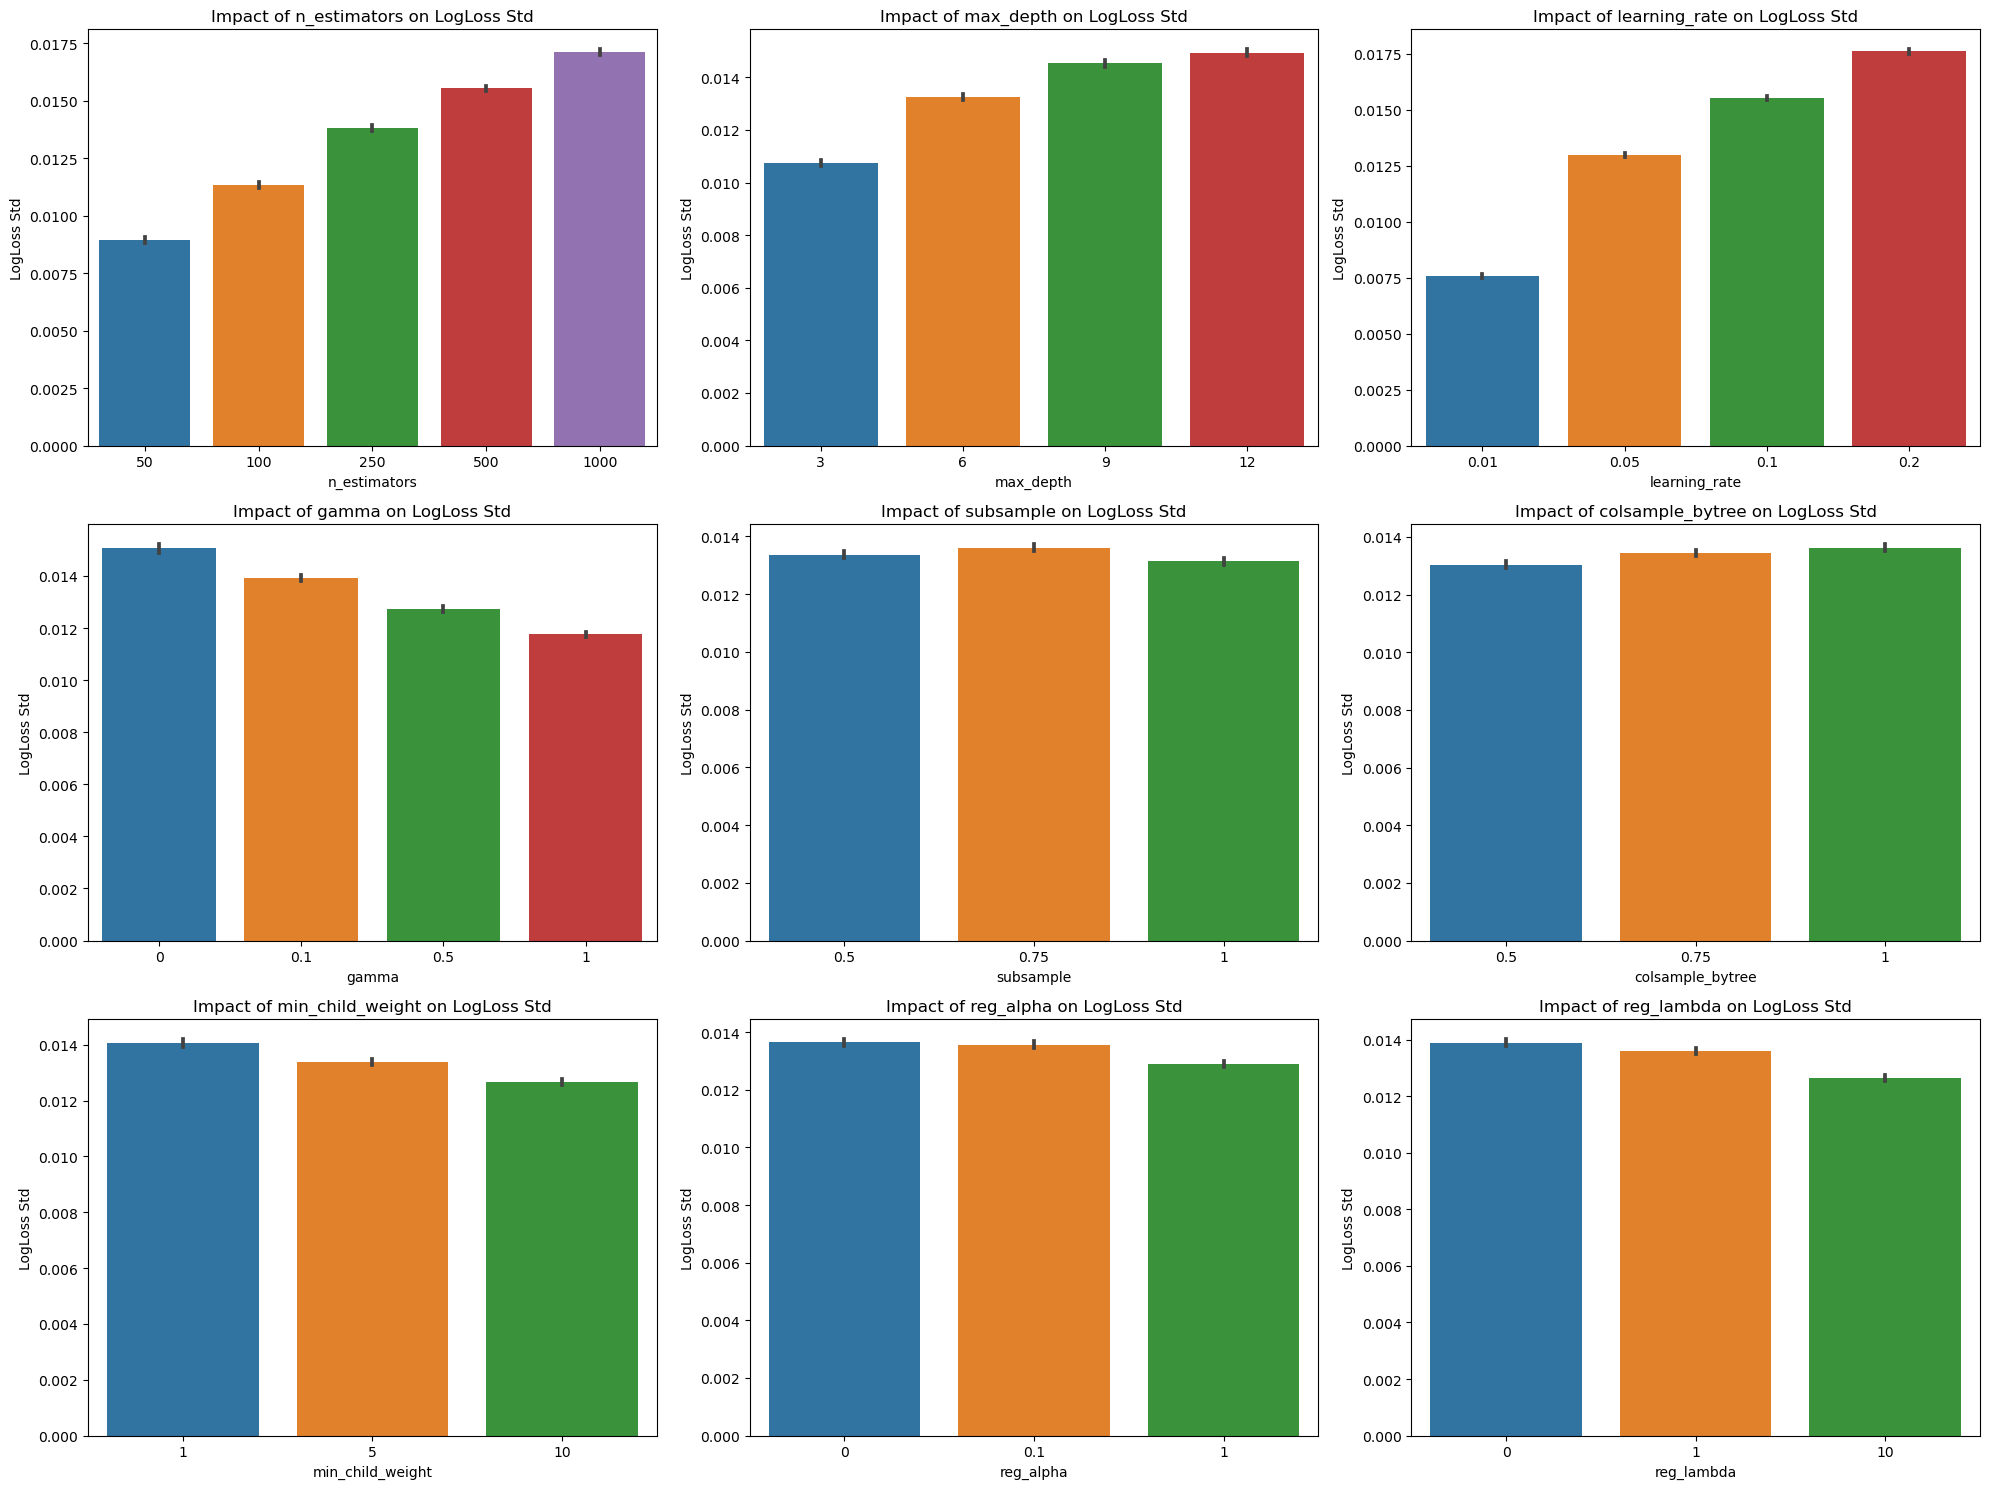

In [56]:
plt.figure(figsize=(20, 15))
for i, hyperparam in enumerate(hyperparameters, 1):
    plt.subplot(3, 3, i)
    sns.barplot(data=df_score_random, x=hyperparam, y='LogLoss_std')
    plt.title(f'Impact of {hyperparam} on LogLoss Std')
    plt.xlabel(hyperparam)
    plt.ylabel('LogLoss Std')
plt.tight_layout()
plt.show()


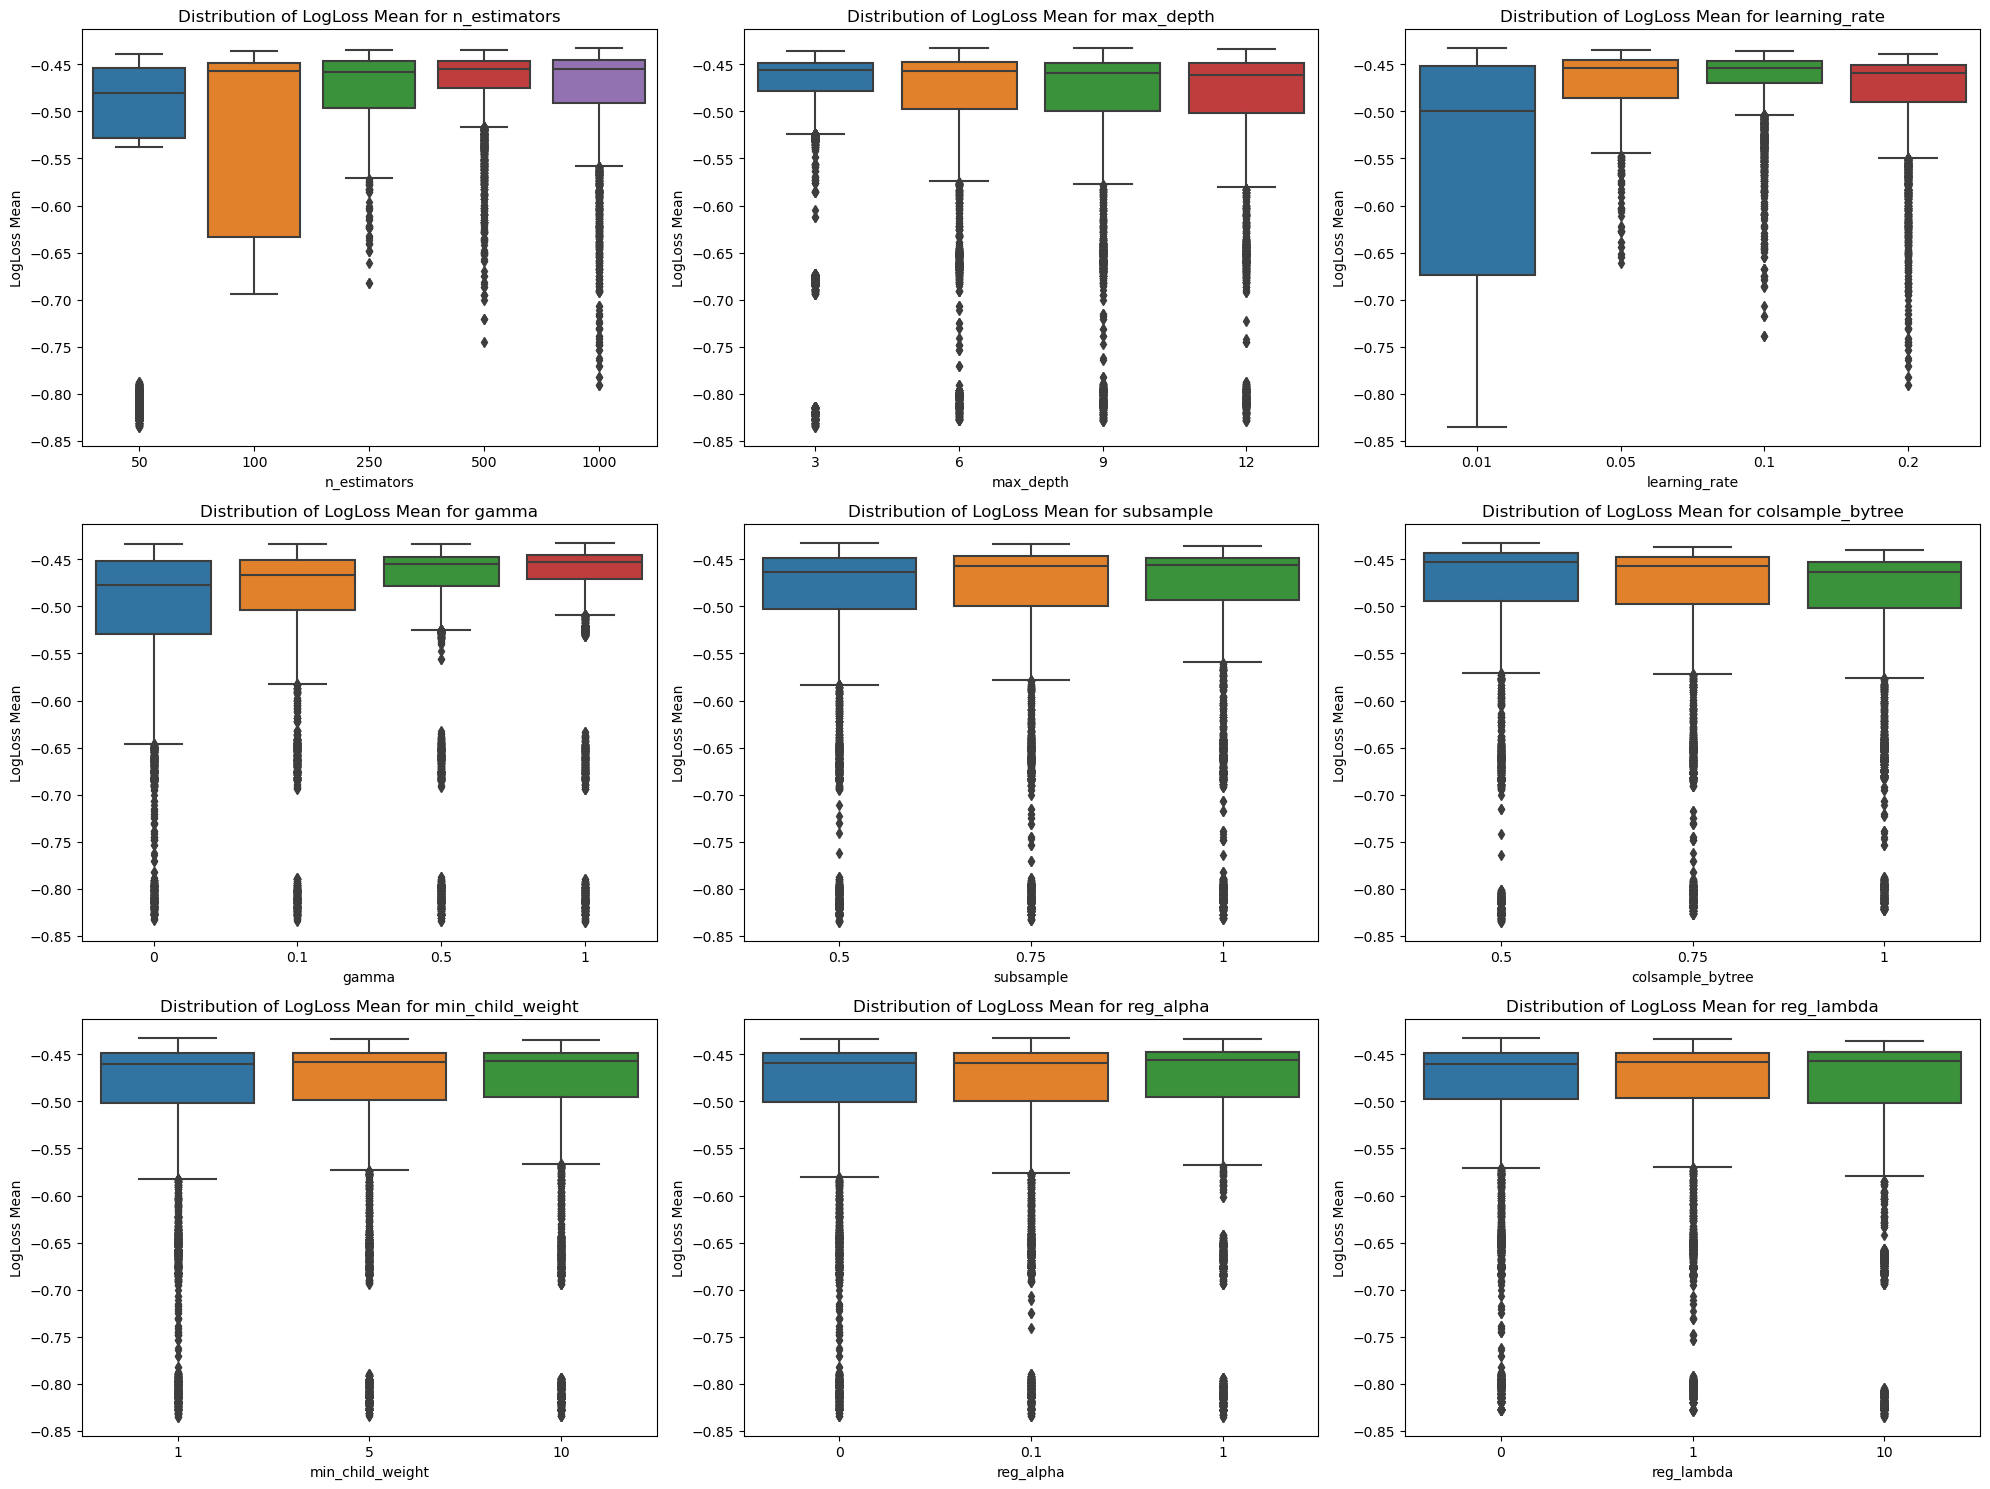

In [57]:
plt.figure(figsize=(20, 15))
for i, hyperparam in enumerate(hyperparameters, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df_score_random, x=hyperparam, y='LogLoss_mean')
    plt.title(f'Distribution of LogLoss Mean for {hyperparam}')
    plt.xlabel(hyperparam)
    plt.ylabel('LogLoss Mean')
plt.tight_layout()
plt.show()
